# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

response = requests.get(query_url + city).json()
response

{'coord': {'lon': 100.3174, 'lat': 18.339},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 66.2,
  'feels_like': 69.75,
  'temp_min': 66.2,
  'temp_max': 66.2,
  'pressure': 1017,
  'humidity': 94},
 'visibility': 3000,
 'wind': {'speed': 2.64, 'deg': 57},
 'clouds': {'all': 4},
 'dt': 1612404057,
 'sys': {'type': 1,
  'id': 9249,
  'country': 'TH',
  'sunrise': 1612396268,
  'sunset': 1612437247},
 'timezone': 25200,
 'id': 1606983,
 'name': 'Rong Kwang',
 'cod': 200}

In [4]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
name=[]
country=[]
humidity=[]
temp=[]
cloudy=[]
wind=[]
city_num=[]
lon=[]
lat=[]
date=[]

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response['name'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp'])
        cloudy.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_num.append(response['id'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        date.append(response['dt'])
        print(f"Processing Record | {city}")
        
    except KeyError:
        print("City not found.")
        

Beginning Data Retrieval
-----------------------------
Processing Record | avarua
Processing Record | hilo
Processing Record | albany
Processing Record | bluff
Processing Record | port alfred
Processing Record | novopokrovka
City not found.
Processing Record | punta arenas
Processing Record | kailua
Processing Record | sola
Processing Record | ushuaia
City not found.
Processing Record | kapaa
Processing Record | parana
City not found.
Processing Record | suntar
Processing Record | muros
Processing Record | east london
City not found.
Processing Record | saint-georges
Processing Record | margate
Processing Record | ust-maya
Processing Record | busselton
Processing Record | upernavik
Processing Record | rodrigues alves
Processing Record | mataura
Processing Record | zhangye
City not found.
Processing Record | khatanga
Processing Record | hobart
Processing Record | yellowknife
Processing Record | vaini
Processing Record | sao filipe
Processing Record | san patricio
Processing Record | vic

City not found.
Processing Record | simeonovgrad
Processing Record | umtata
Processing Record | namioka
Processing Record | watsa
Processing Record | sao joao da barra
Processing Record | talwandi bhai
Processing Record | vahan
Processing Record | bay-khaak
Processing Record | vagur
Processing Record | yabrud
Processing Record | cangzhou
Processing Record | cicevac
Processing Record | brae
Processing Record | mweka
Processing Record | chukhloma
Processing Record | itarema
Processing Record | puerto del rosario
City not found.
Processing Record | meulaboh
Processing Record | ust-omchug
Processing Record | tomatlan
Processing Record | kalanguy
Processing Record | quelimane
City not found.
Processing Record | chumphon
Processing Record | phan thiet
City not found.
Processing Record | mabaruma
Processing Record | sioux lookout
Processing Record | atherton
Processing Record | te anau
Processing Record | tucuman
Processing Record | mayo
Processing Record | gweta
Processing Record | moerai
Pr

Processing Record | manjacaze
City not found.
Processing Record | bosaso
Processing Record | vestmanna
Processing Record | andenes
Processing Record | tyukalinsk
Processing Record | bam
Processing Record | hasaki
Processing Record | dillon
Processing Record | san quintin
Processing Record | praya
Processing Record | chuka
Processing Record | shyroke
Processing Record | turukhansk
Processing Record | inhambane
Processing Record | dutlwe
Processing Record | halifax
Processing Record | tahoua
Processing Record | athabasca
Processing Record | grao mogol
Processing Record | vila do maio
Processing Record | villa carlos paz
Processing Record | la ronge
Processing Record | kenai
Processing Record | vao
City not found.
Processing Record | poum
Processing Record | dauphin
Processing Record | nuevo progreso
Processing Record | daru
City not found.
Processing Record | utica
Processing Record | hammerfest
Processing Record | imuris
Processing Record | rong kwang


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
data = {'City': name,
         'Country': country, 
         'Humidity': humidity,
        'Lat': lat,
        'Lng': lon,
         'Temperature': temp, 
         'Cloud Cover': cloudy,
           'Winds': wind,
           'Date': date}
city_weather = pd.DataFrame(data)
city_weather.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
city_weather.loc[city_weather['Humidity']>100]


,City,Country,Humidity,Lat,Lng,Temperature,Cloud Cover,Winds,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

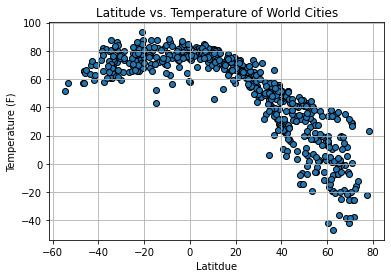

In [21]:
plt.scatter(city_weather['Lat'], city_weather['Temperature'], edgecolor='black')
plt.title('Latitude vs. Temperature of World Cities')
plt.xlabel('Latitdue')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

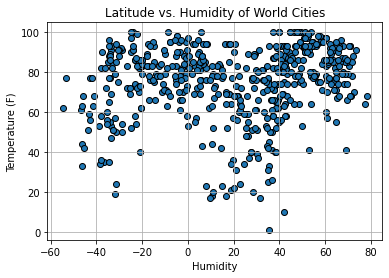

In [22]:
plt.scatter(city_weather['Lat'], city_weather['Humidity'], edgecolor='black')
plt.title('Latitude vs. Humidity of World Cities')
plt.xlabel('Humidity')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

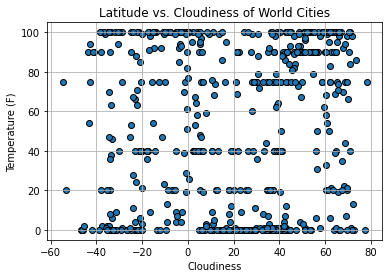

In [23]:
plt.scatter(city_weather['Lat'], city_weather['Cloud Cover'], edgecolor='black')
plt.title('Latitude vs. Cloudiness of World Cities')
plt.xlabel('Cloudiness')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

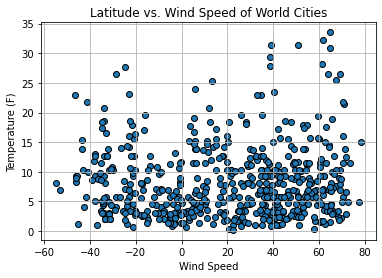

In [24]:
plt.scatter(city_weather['Lat'], city_weather['Winds'], edgecolor='black')
plt.title('Latitude vs. Wind Speed of World Cities')
plt.xlabel('Wind Speed')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression